# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [2]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from typing import Union, Tuple

%load_ext memory_profiler

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [3]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

# for size in [100, 1000, 10000]:
#     print('SIZE: ', size)
#     print('Timing: ')
#     saved_timing = %timeit -r 5 -n 10 -o func(size)
#     saved_timing.average   # średni czas próby
#     saved_timing.stdev     # odchylenie standardowe
#     print('Memory usage: ')
#     %memit func(size)
#     print('\n')

***Zadanie 1.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


Powinien wyjść wynik równy c
Liczby niewymierne np. niektóre ułamki lub pierwiasktki mają nieskończoną reprezentację
Wyniki różnią się od siebie przez istnienie zera maszynowego, gdy liczba jest tak małą (wiele miejsc po przecinku) to znikania 
Występuje tu błąd zaokrągleń 
Można np zmienić kolejność działań, czyli P2 = b-b + c, wtedy zniknie problem konsekwencji Lematy Wilkinsona, jest to zaprezentowane pomarańczowymi wykresami


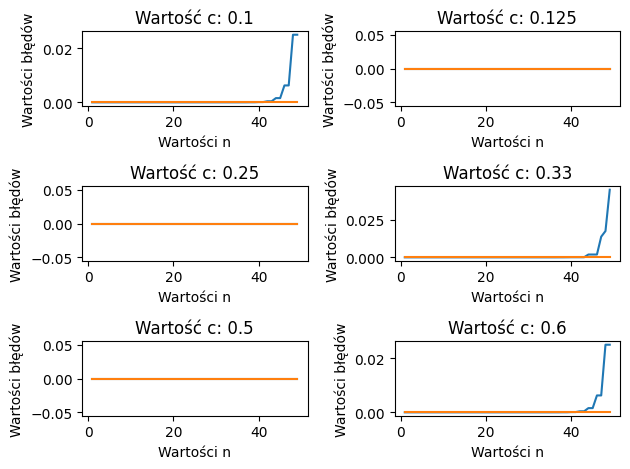

In [4]:
def p_diff(n: int, c: float) -> float:
    if not(isinstance(n, int)) or not (isinstance(c, (int, float))):
        return np.NaN
  
    b = 2 ** n
    P1 = b - b + c
    P2 = b + c - b

    return np.abs(P1 - P2)
indicator = 1
differences = []
c_values = [0.1, 0.125, 0.25, 0.33, 0.5, 0.6]
n_values = []
for i in range(1, 50):
    n_values.append(i)
# print(n_values)
for c in c_values:
    for n in n_values:
        x = p_diff(n, c)
        differences.append(x)
    
    plt.subplot(3, 2, indicator)
    plt.plot(n_values, differences)
    plt.title(f"Wartość c: {c}")
    plt.xlabel("Wartości n")
    plt.ylabel("Wartości błędów")
    differences = []
    indicator += 1
plt.tight_layout()

print("Powinien wyjść wynik równy c")
print("Liczby niewymierne np. niektóre ułamki lub pierwiasktki mają nieskończoną reprezentację")
print("Wyniki różnią się od siebie przez istnienie zera maszynowego, gdy liczba jest tak małą (wiele miejsc po przecinku) to znikania ")
print("Występuje tu błąd zaokrągleń ")
print("Można np zmienić kolejność działań, czyli P2 = b-b + c, wtedy zniknie problem konsekwencji Lematy Wilkinsona, jest to zaprezentowane pomarańczowymi wykresami")

def p_diff(n: int, c: float) -> float:
    if not(isinstance(n, int)) or not (isinstance(c, (int, float))):
        return np.NaN
  
    b = 2 ** n
    P1 = b - b + c
    P2 = b - b + c

    return np.abs(P1 - P2)
indicator = 1
differences = []
c_values = [0.1, 0.125, 0.25, 0.33, 0.5, 0.6]
n_values = []
for i in range(1, 50):
    n_values.append(i)
# print(n_values)
for c in c_values:
    for n in n_values:
        x = p_diff(n, c)
        differences.append(x)
    
    plt.subplot(3, 2, indicator)
    plt.plot(n_values, differences)
    plt.title(f"Wartość c: {c}")
    plt.xlabel("Wartości n")
    plt.ylabel("Wartości błędów")
    differences = []
    indicator += 1
plt.tight_layout()

***Zadanie 2.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

In [5]:
def exponential(x: Union[int, float], n: int) -> float:
    sum = 0
    for i in range(1, n + 1) :
        sum += (1/scipy.special.factorial(i)  *  x**i)
    return sum
my_exp = exponential(20, 30)
print(my_exp)
print(np.exp(20))
print("Przykład obrazuje błąd obcięcia, aby otrzymać równy wynik musielibyśmy wykonać nieskończenie wiele obliczeń")
print("Błąd bezwzględny:")
print(np.abs(np.exp(2) - exponential(2, 5)))
print(np.abs(np.exp(2) - exponential(2, 10)))
print(np.abs(np.exp(2) - exponential(2, 100)))

print("Błąd względny:")
print((np.abs(np.exp(2) - exponential(2, 5)))/np.exp(2))
print((np.abs(np.exp(2) - exponential(2, 10)))/np.exp(2))
print((np.abs(np.exp(2) - exponential(2, 100)))/np.exp(2))


478627748.0335321
485165195.4097903
Przykład obrazuje błąd obcięcia, aby otrzymać równy wynik musielibyśmy wykonać nieskończenie wiele obliczeń
Błąd bezwzględny:
1.1223894322639838
1.0000613899359427
1.0000000000000018
Błąd względny:
0.15189889171722715
0.13534359146098138
0.13533528323661292


***Zadania 3.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [8]:
def coskx1(k: int, x: Union[int, float]) -> float:
  
    if not(isinstance(k, int)) or not (isinstance(x, (int, float))) or k<0:
        return np.NaN
    if k == 1:
        return np.cos(x)
    if k == 0:
        return 1
    return 2 * np.cos(x) * coskx1(k-1, x) - coskx1(k-2, x)
   
def coskx2(k: int, x: Union[int, float]) -> Tuple[float, float]:
    
    if not(isinstance(k, int)) or not (isinstance(x, (int, float))) or k<0:
        return np.NaN
    if k == 1:
        return (np.cos(x), np.sin(x))
    if k == 0:
        return (1, 0)
    
    # return np.cos(x) * coskx2(k-1, x) - np.sin(x) * sinkx(k-1, x)
    cosk_x, sin_kx = coskx2(k - 1, x)

    cos_kx = np.cos(x) * cosk_x - np.sin(x) * sin_kx
    sin_kx = np.sin(x) * cosk_x + np.cos(x) * sin_kx

    return (cos_kx, sin_kx)
print(coskx1(5, 5))
print(coskx1(10, 5))
print(coskx2(5, 5))
print(coskx2(10, 5))

0.9912028118634735
0.9649660284921131
(0.9912028118634735, -0.13235175009777317)
(0.964966028492113, -0.262374853703929)


***Zadanie 4.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 2 w zależności od różnych wartości $N$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby $e$ w zależności od $N$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby $e$ od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

SIZE:  10
Timing: 
53.4 µs ± 6.13 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 137.74 MiB, increment: 0.32 MiB
SIZE:  50
Timing: 
223 µs ± 40.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 137.77 MiB, increment: 0.02 MiB
SIZE:  100
Timing: 
601 µs ± 86.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 137.77 MiB, increment: 0.00 MiB
SIZE:  200
Timing: 
978 µs ± 37.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 137.77 MiB, increment: 0.00 MiB
SIZE:  400
Timing: 
2.85 ms ± 763 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 137.77 MiB, increment: 0.01 MiB
SIZE:  800
Timing: 
5.49 ms ± 847 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 137.78 MiB, increment: 0.00 MiB
SIZE:  1000
Timing: 
6.67 ms ± 841 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usa

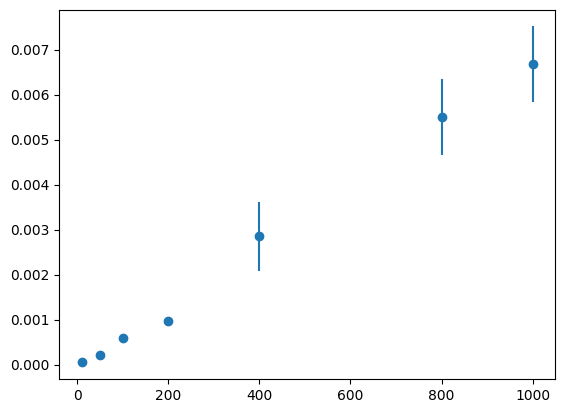

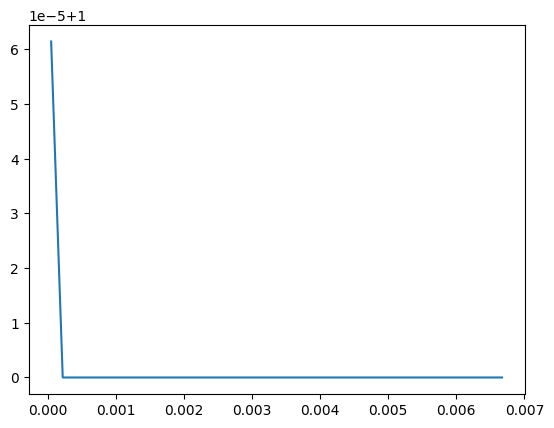

In [ ]:
import timeit

def exponential(x: Union[int, float], n: int) -> float:
    sum = 0
    for i in range(1, n + 1) :
        sum += (1/scipy.special.factorial(i)  *  x**i)
    return sum
times = []
memory_usages = []
absolute_errors = []
odchylenia = []
N_values = [10, 50 ,100, 200, 400, 800, 1000]
for size in N_values:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o exponential(2, size)
    absolute_errors.append(np.abs(np.exp(2) - exponential(2, size))) # błąd bezwzględny dla tego przypadku
    saved_timing.average   # średni czas próby
    odch_std = saved_timing.stdev 
    odchylenia.append(odch_std)    # odchylenie standardowe
    times.append(saved_timing.average)

    print('Memory usage: ')
    memmory_used = %memit -o exponential(2, size)
    memory_usages.append(memmory_used.mem_usage)
print(times)
plt.figure(1)
# plt.semilogy(n_values, times, 'o-', label='Execution Time')
plt.errorbar(N_values, times, yerr=odchylenia, fmt='o')
plt.figure(2)
plt.plot(times, absolute_errors) 
